# Hough Transform

In [1]:
import cv2
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from math import pi, sin, cos
import time
import os
%matplotlib inline

In [2]:
def plot_255img(img: np.array, title: str, size = [5,5]) -> None:
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.rcParams['figure.figsize'] = size
    plt.show()

def plot_rgbimg(img: np.array, title: str, size = [5,5]) -> None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.rcParams['figure.figsize'] = size
    plt.show()

### Line detection - Hough Tranform

<img src="Images/eq_3.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" 
        width="1200"
        height="400"/>



#### Gray scale image

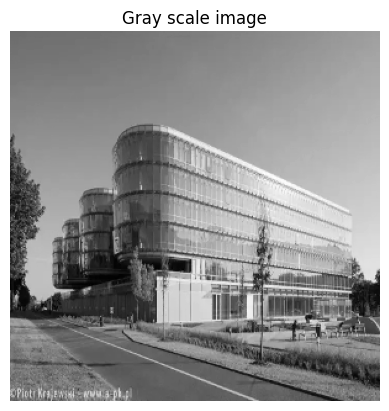

In [3]:
dir_path = os.getcwd().replace("\\","/")+"/Images/"
im_name = "building.png"

bgr_img = cv2.resize(cv2.imread(dir_path+im_name ), (300,300))
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

plot_255img(img, "Gray scale image", [5,5])

#### Perform Edge Detection Algorithm and cleaning

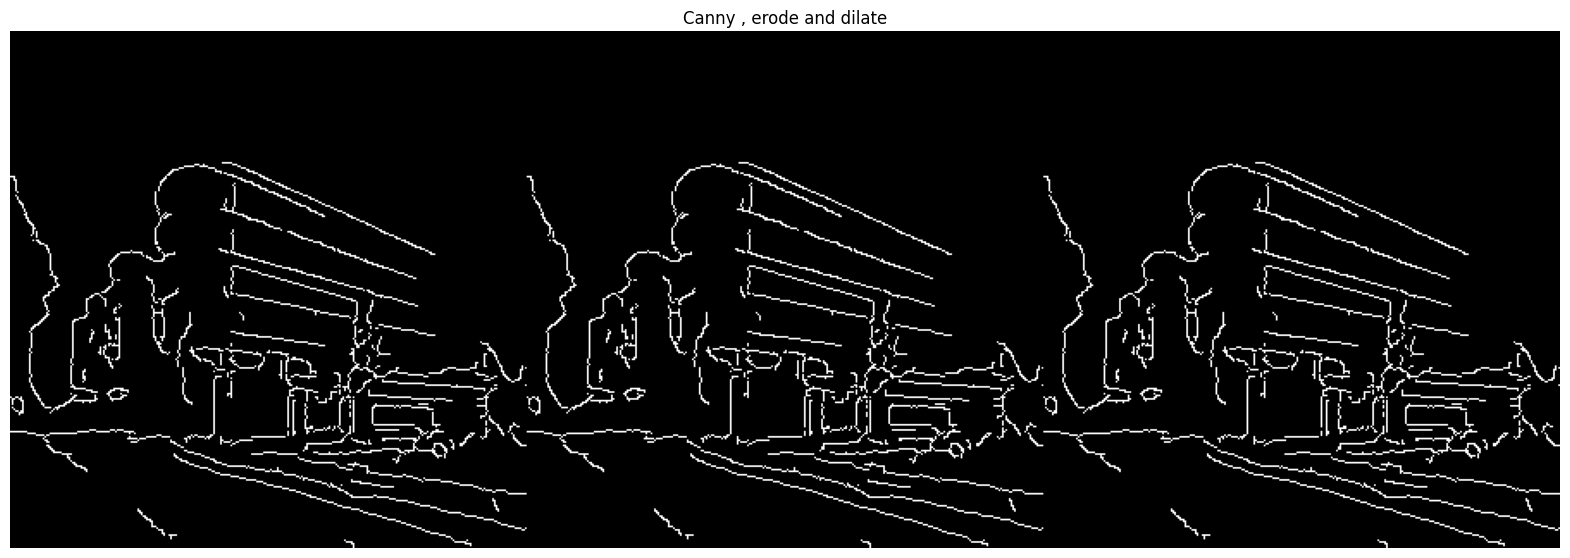

In [5]:
blur =  cv2.GaussianBlur(img, ksize=(9,9), sigmaX=3.0)
edges = cv2.Canny(blur, 50, 80)

#Remove noise and non-desired lines
erode = cv2.erode(edges, kernel=np.ones((1, 3), np.uint8), iterations=0)
dilate = cv2.dilate(erode, kernel=np.ones((3, 3), np.uint8), iterations=0)
edges = dilate
plot_255img( np.concatenate((edges, erode, dilate),axis = 1), "Canny , erode and dilate"  , [20,20])

##### Hough Transform

In [22]:
f,c = img.shape
d = int(np.sqrt(f**2 + c**2))  #Max diatance is diagonal one 

theta = np.arange(0, 180)
theta_rad = np.deg2rad(theta)

p_threshold = (-d,d)

rhos = []
plotting = []

H = np.zeros((int(2*d), len(theta)+1)) #Hough accumulator 

In [23]:
#Obtain pixels that are edges
non_zero_x, non_zero_y = np.nonzero(img)

for i in range(len(non_zero_x)):
    x = non_zero_x[i]
    y = non_zero_y[i]
    
    #Calculate rho
    r = np.array(-x * np.cos(theta_rad) + y * np.sin(theta_rad), dtype='int' )
    rhos.append(r)
    #Increment values
    H[r + d, theta] += 1

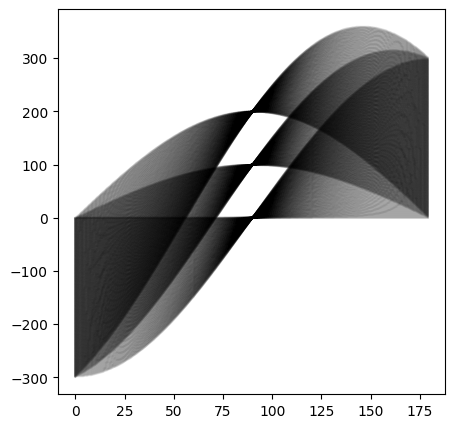

In [24]:
c = 0 
plt.rcParams['figure.figsize'] = [5,5]
for i in rhos:
    if c%100 == 0 :
        plt.plot(theta,i, 'k', alpha = 0.1)
    c += 1
plt.show()

Filter for the Accumulator

In [49]:
x_max, y_max = np.where(H == np.max(H))

H_max = [(x_max[0],y_max[0])]
H[H_max[0]] = 0

fh,ch = H.shape
for i in range(fh):
    for j in range(ch):
        if H[i][j] != 0:
            c = 0
            for best in H_max:
                if (i- best[0]) > 100 and (j- best[1]) > 50 and (i,j) not in H_max:
                    c += 1
            if c == len(H_max):
                H_max.append((i,j)) 
H_max

[(424, 44), (525, 95), (626, 146)]

Now, from Hough space, let's go back to image space

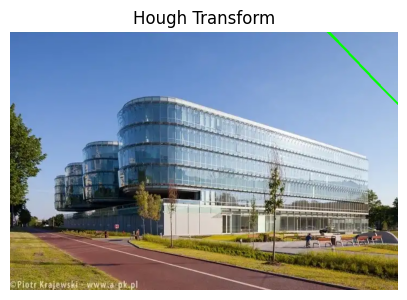

In [50]:
img_ = cv2.imread(dir_path+im_name)

for i in H_max:
    p,theta = i
    
    a = cos(np.deg2rad(theta))
    b = sin(np.deg2rad(theta))

    #X = (p)*a
    #Y = (p)*b
    
    #x1 = int(X + 1000*(b))
    #y1 = int(Y + 1000*(a))
    #x2 = int(X - 1000*(b))
    #y2 = int(Y - 1000*(a))

    X = np.linspace(-1000,1000)
    Y = (X*b + p)/(a)
    line = np.array([Y,X]).T.reshape((-1,1,2)).astype("int64")

    #print(np.array([X,Y]).reshape((-1,1,2)).shape)
    img_ = cv2.polylines(img_,[line],False, (0,255,0),3)   
    #img_ = cv2.line(img_,(x1,y1),(x2,y2),(0,255,0),3)   

plot_rgbimg(img_, "Hough Transform", [5,5])



((424, 45), 753.0)